# Criando os nomes

In [1]:
import pandas as pd

In [7]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [10]:
print(f'Quantidade de nomes: {len(nomes_f) + len(nomes_m)}')

Quantidade de nomes: 400


In [11]:
frames = [nomes_f, nomes_m]

In [43]:
type(frames)

list

In [19]:
nomes = pd.concat(frames)['nome'].to_frame()

In [21]:
nomes.sample(5)

,nome
117,WAGNER
2,FRANCISCA
75,NELSON
50,VINICIUS
101,SILVIO


In [26]:
nomes.columns.name = ''

In [27]:
nomes.head()

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA


# Incluindo ID dos Alunos

In [30]:
import numpy as np
np.random.seed(123)

In [31]:
total_alunos = len(nomes)
total_alunos

400

In [32]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [36]:
nomes.sample(5)

,nome,id_aluno
92,DIOGO,61
166,KELLY,109
98,THAIS,148
142,HUGO,378
184,MARILIA,282


In [37]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [38]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@servicodoemail.com
1,ANA,43,@dominiodoemail.com.br
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@dominiodoemail.com.br
...,...,...,...
195,WALTER,231,@servicodoemail.com
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@servicodoemail.com
198,ALVARO,383,@dominiodoemail.com.br


In [39]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [41]:
nomes.sample(5)

,nome,id_aluno,dominio,email
75,NELSON,392,@dominiodoemail.com.br,nelson@dominiodoemail.com.br
18,RAIMUNDO,70,@servicodoemail.com,raimundo@servicodoemail.com
120,JOSIANE,178,@servicodoemail.com,josiane@servicodoemail.com
74,ALAN,355,@dominiodoemail.com.br,alan@dominiodoemail.com.br
71,MARTA,265,@dominiodoemail.com.br,marta@dominiodoemail.com.br


# Criando a Tabela Cursos

In [45]:
!pip3 install html5lib
!pip3 install lxml

In [46]:
import html5lib

In [47]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [48]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [49]:
type(cursos)

list

In [51]:
cursos = cursos[0]

In [52]:
type(cursos)

pandas.core.frame.DataFrame

# Alterando o Index de cursos

In [53]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [60]:
cursos.rename(columns={'Nome do curso' : 'Nome_do_curso'}, inplace=True)
cursos.head()

,Nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [64]:
cursos['id_curso'] = cursos.index + 1

In [66]:
cursos.head()

,Nome_do_curso,id_curso
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [68]:
cursos = cursos.set_index('id_curso')
cursos.head()

,Nome_do_curso
id_curso,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os Alunos nos cursos

In [84]:
nomes.sample(5)

,nome,id_aluno,dominio,email
151,JOSUE,393,@servicodoemail.com,josue@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
31,RICARDO,336,@servicodoemail.com,ricardo@servicodoemail.com
182,CHARLES,33,@servicodoemail.com,charles@servicodoemail.com
134,VERONICA,274,@servicodoemail.com,veronica@servicodoemail.com


In [90]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [94]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
73,MARCO,270,@dominiodoemail.com.br,marco@dominiodoemail.com.br,5
181,IRACEMA,168,@dominiodoemail.com.br,iracema@dominiodoemail.com.br,3
96,EVERTON,87,@servicodoemail.com,everton@servicodoemail.com,1
28,SONIA,242,@dominiodoemail.com.br,sonia@dominiodoemail.com.br,3
5,PAULO,11,@servicodoemail.com,paulo@servicodoemail.com,1


In [96]:
nomes.matriculas.describe()

count    400.000000
mean       2.185000
std        1.791312
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       18.000000
Name: matriculas, dtype: float64

In [97]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


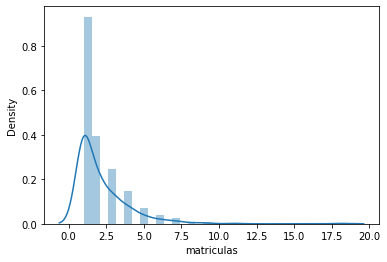

In [98]:
sns.distplot(nomes.matriculas)

In [102]:
nomes.matriculas.value_counts()

1     198
2      84
3      52
4      31
5      15
6       8
7       6
9       2
8       2
18      1
11      1
Name: matriculas, dtype: int64

In [104]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,1
189,WESLEI,215,@servicodoemail.com,weslei@servicodoemail.com,2
141,NEIDE,325,@servicodoemail.com,neide@servicodoemail.com,3
174,DENIS,69,@dominiodoemail.com.br,denis@dominiodoemail.com.br,2
125,VALMIR,19,@dominiodoemail.com.br,valmir@dominiodoemail.com.br,7


# Selecionando cursos

In [105]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [106]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [107]:
matriculas.head()

,id_aluno,id_curso
0,235,14
1,235,7
2,43,7
3,304,7
4,156,13


In [109]:
matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,Nome_do_curso
id_curso,,
1,56,Lógica de programação
2,28,Java para Web
3,51,C# para Web
4,41,Ruby on Rails
5,12,Cursos de Python
7,75,.NET para web
8,67,Novas integrações com Java
9,67,TDD com Java
10,41,Código limpo com C#


In [111]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['Nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [112]:
matriculas_por_curso

,quantidade_de_alunos,Nome_do_curso
id_curso,,
1,56,Lógica de programação
2,28,Java para Web
3,51,C# para Web
4,41,Ruby on Rails
5,12,Cursos de Python
7,75,.NET para web
8,67,Novas integrações com Java
9,67,TDD com Java
10,41,Código limpo com C#


# Saída em diferentes formatos

In [113]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,Nome_do_curso
id_curso,,
1,56,Lógica de programação
2,28,Java para Web
3,51,C# para Web


In [114]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index= False)

In [116]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":56,"2":28,"3":51,"4":41,"5":12,"7":75,"8":67,"9":67,"10":41,"11":73,"12":5,"13":6,"14":84,"15":71,"16":54,"17":65,"18":14,"19":26,"20":38},"Nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [118]:
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>Nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>56</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>28</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>51</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>41</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>7</th>
      <td>75</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>67</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>67</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>41</td>
